# Chronic Kidney Disease Prediction

# Abstract

The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Class(renamed to ChronicKidneyDisease).

# Aim:
In this assignment we aim to develop a complete ML project with

- Checking Data Quality by performing different EDA techniques
- Feature Selection
- Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
- Model Interpretibility
- Reports and Visualizations

# Column Description for our Dataset


##### Kaggle Dataset Link: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

### Target Variable/Dependent Variable

__ChronicKidneyDisease__ -  Is the person suffering from chronic Kidney Disease. This is the variable we have to predict
Predictor Variables/Independent Variables


### Predictor Variables/Independent Variables

1. __Blood Pressure__ - A condition in which the force of the blood against the artery walls is too high.
2. __SpecificGravity__ - specific gravity, also called relative density, ratio of the density of a substance to that of a standard   substance.
3. __Albumin__-Albumin is a protein made by the liver. A albumin test measures the amount of this protein in the clear liquid       portion of the blood.
4. __Sugar__- A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126      mg/dL or higher indicates you have diabetes.
5. __RedBloodCell__- The results of RBC indices are used to diagnose different types of anemia.
6. __BloodUrea__ - The blood urea test measures how much urea nitrogen is in your blood.
7. __SerumCreatinine__ -A measurement of creatinine in your blood or urine provides clues to help your doctor determine how well the    kidneys are working.
8. __Sodium__-It helps maintain normal blood pressure, supports the work of your nerves and muscles, and regulates your body's fluid    balance. A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).
9. __Pottasium__- Potassium is a chemical that is critical to the function of nerve and muscle cells, including those in your heart. Blood potassium level is normally 3.6 to 5.2 millimoles per liter (mmol/L)
10. __Hemoglobin__- Hemoglobin is a protein in red blood cells that carries oxygen.Normal results for adults vary, but in general       are:Male: 13.8 to 17.2 grams per deciliter (g/dL) or 138 to 172 grams per liter (g/L)
    Female: 12.1 to 15.1 g/dL or 121 to 151 g/L.
11. __WhiteBloodCellsCont__- The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). 
12. __RedBloodCellsCont__- A normal RBC count would be around: men – 4.0 to 5.9 x 10*12/L. women – 3.8 to 5.2 x 10*12/L.
13. __Hypertension__- Having blood pressure measures consistently above normal may result in a diagnosis of  hypertension.

In [64]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool


import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

# What question are you trying to answer? How did you frame it as an ML task?

- The objective here is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset such as Heloglobin, Specific Gravity, Hypertension, Sugar Levels.
- ChronicKidneyDisease has only binary data so we are assuming that '1' means that the person has a Chronic Kidney Disease and '0' means the person is free of any chronic disease
- Since the target variable ChronicKidneyDisease is binary with only two values ('0' or '1'), we can train a binary classification model using supervised learning algorithms such as logistic regression, decision trees, random forests, or support vector machines.
- Chronic kidney disease (CKD) is a classification problem because it involves categorizing individuals based on the stage and severity of their disease. CKD is a progressive condition that can develop slowly over time, often with few or no symptoms until the disease is advanced.
- In my case, the model is being trained to learn patterns and relationships between various medical parameters.
- Once the model is trained on certain portion of data it can be used to make predictions on new data, where it takes in the different medical parameters for an individual and outputs a prediction of whether or not they have the disease.



# What is human-level performance on that task? What level of performance is needed?
-  Generally, a clinician with experience in diagnosing chronic kidney disease can achieve high accuracy in predicting the disease, often exceeding 90% accuracy in many cases.
- The level of performance needed for chronic kidney disease prediction using ML algorithms may vary depending on the specific application and use case of the model. If the model is able to predict the true positive predictions and false predictions, false predictions will mislead the person of assuming he is not prone to disease  
- A well-designed and validated ML model that achieves high accuracy in predicting chronic kidney disease would be considered beneficial for improving patient outcomes and reducing healthcare costs

In [3]:
#Reading file
file_url = "https://raw.githubusercontent.com/Akshathapatil1998/ML_Data_Cleaning_and_Feature_Selection_Chronic_Kidney_Disease_Prediction/main/new_model.csv"
data = pd.read_csv(file_url)

In [4]:
#Renaming columns 
data = data.rename(columns={"Bp":"BloodPressure","Sg":"SpecificGravity","Al":"Albumin","Su":"Sugar","Rbc":"RedBloodCell","Bu":"BloodUrea","Sc":"SerumCreatinine","Sod":"Sodium","Pot":"Pottasium","Hemo":"Hemoglobin","Wbcc":"WhiteBloodCellsCont","Rbcc":"RedBloodCellsCont","Htn":"Hypertension","Class":"ChronicKidneyDisease"})

# Where did the feature data and label come from?
- This dataset is originally from UCI Machine Learning Repository.
- The dataset contains 400 people data and predtion is made based on 13 different parameters 
1. __Blood Pressure__ 
2. __SpecificGravity__ 
3. __Albumin__     
4. __Sugar__     
5. __RedBloodCell__
6. __BloodUrea__ 
7. __SerumCreatinine__ 
8. __Sodium__fluid    
9. __Pottasium__
10. __Hemoglobin__   
11. __WhiteBloodCellsCont__
12. __RedBloodCellsCont__
13. __Hypertension__

# Performing Exploratory Data Analysis

In [5]:

# Checking Data Type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         400 non-null    float64
 1   SpecificGravity       400 non-null    float64
 2   Albumin               400 non-null    float64
 3   Sugar                 400 non-null    float64
 4   RedBloodCell          400 non-null    float64
 5   BloodUrea             400 non-null    float64
 6   SerumCreatinine       400 non-null    float64
 7   Sodium                400 non-null    float64
 8   Pottasium             400 non-null    float64
 9   Hemoglobin            400 non-null    float64
 10  WhiteBloodCellsCont   400 non-null    float64
 11  RedBloodCellsCont     400 non-null    float64
 12  Hypertension          400 non-null    float64
 13  ChronicKidneyDisease  400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [6]:
#Checking missing values in our data
data.isnull().sum()

BloodPressure           0
SpecificGravity         0
Albumin                 0
Sugar                   0
RedBloodCell            0
BloodUrea               0
SerumCreatinine         0
Sodium                  0
Pottasium               0
Hemoglobin              0
WhiteBloodCellsCont     0
RedBloodCellsCont       0
Hypertension            0
ChronicKidneyDisease    0
dtype: int64

### Observations:
- We have 0% missing values both in our independent variables as well as dependent variable

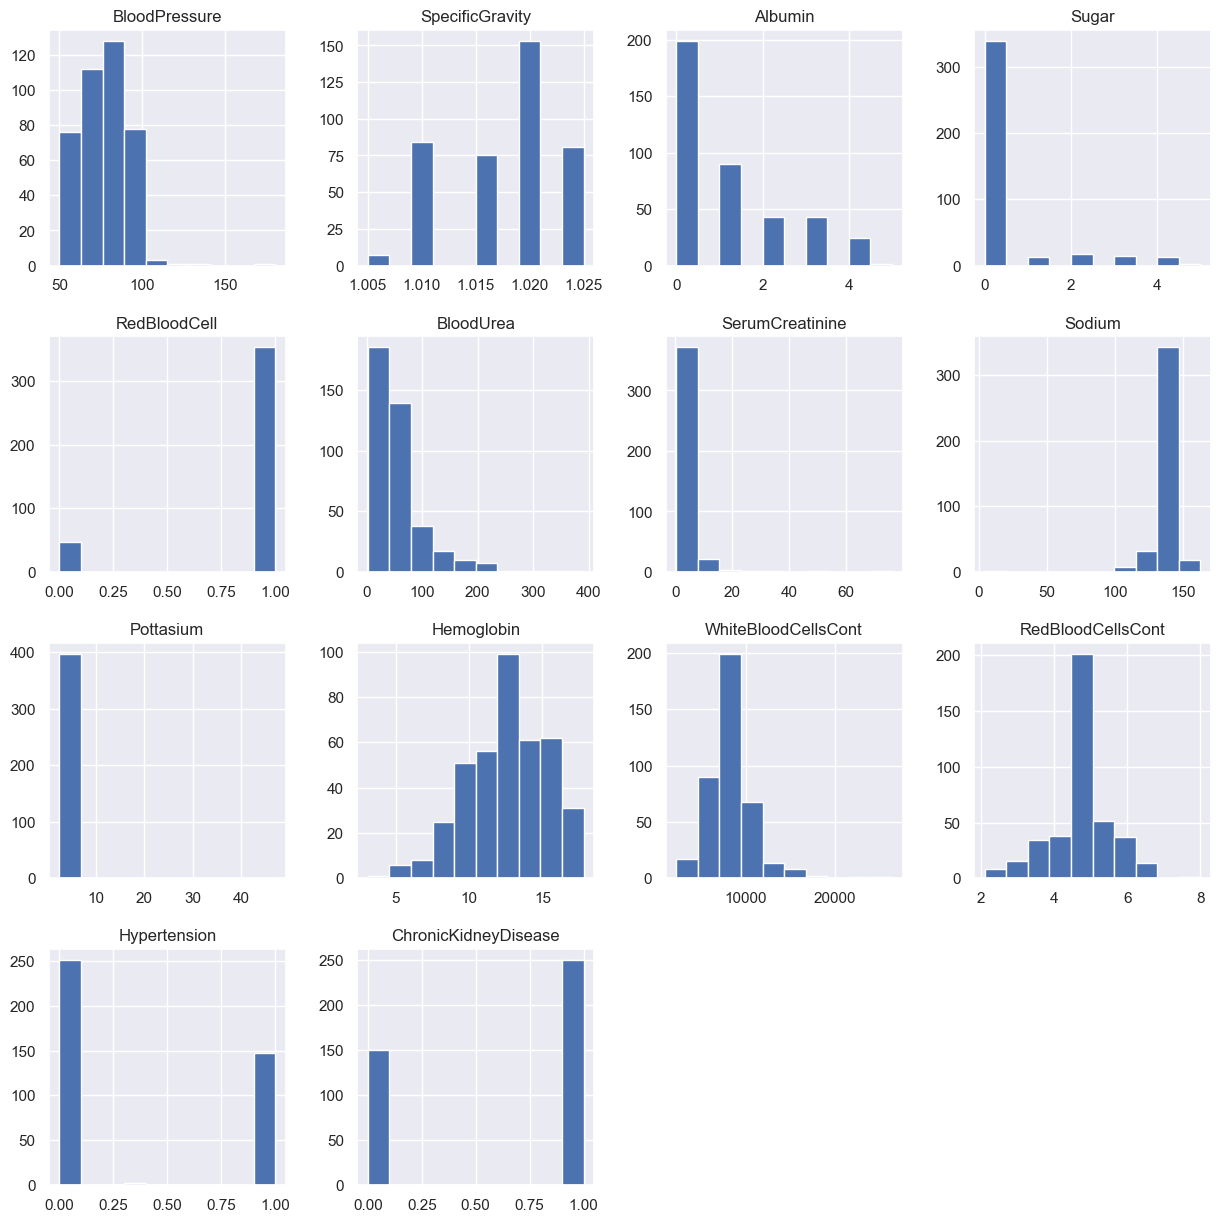

In [7]:
#generating histograms
plot = data.hist(figsize=(15,15))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

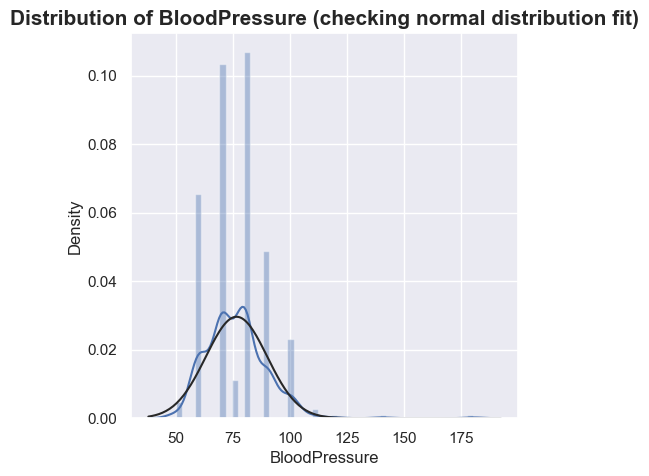

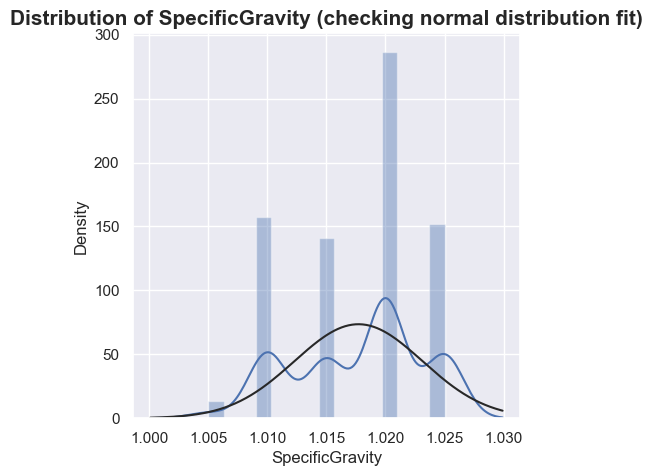

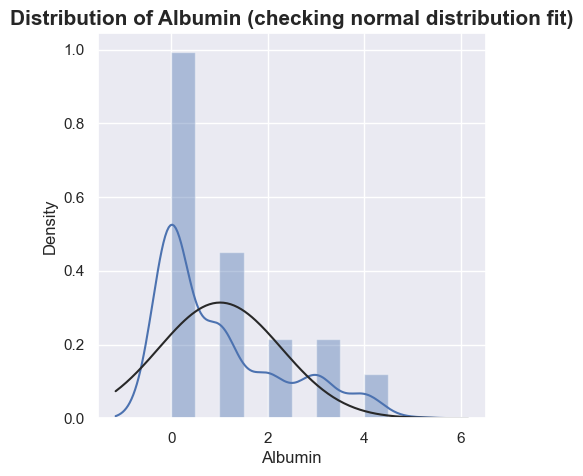

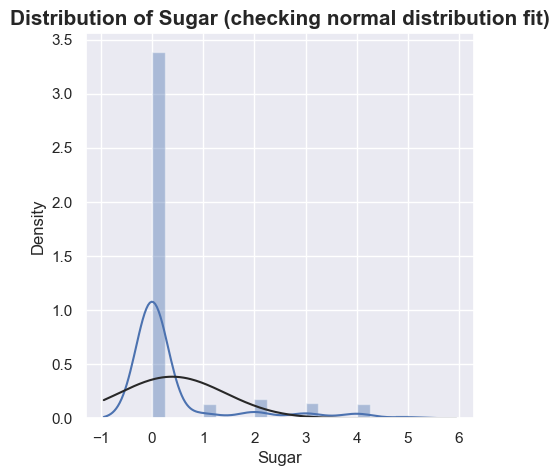

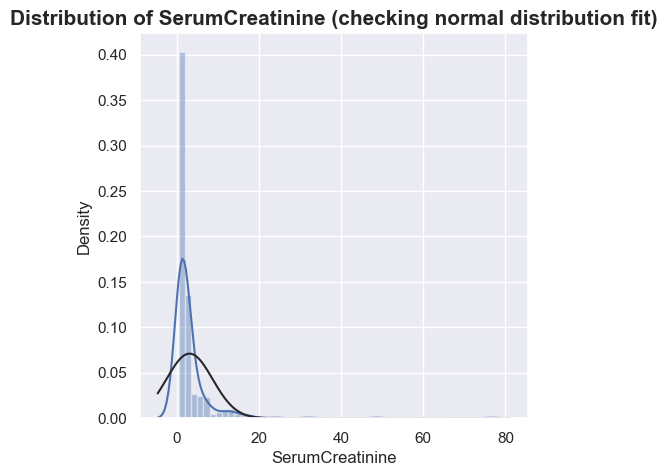

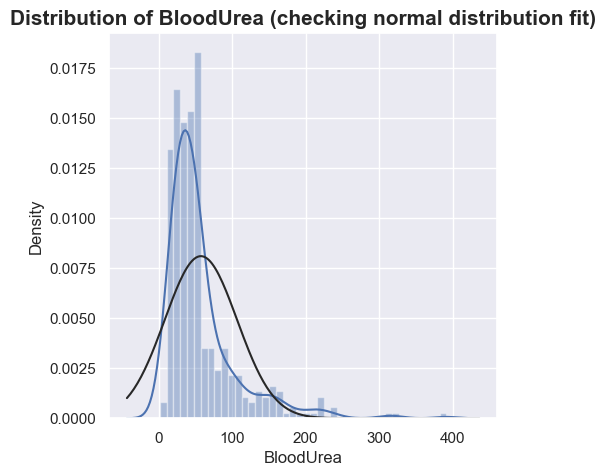

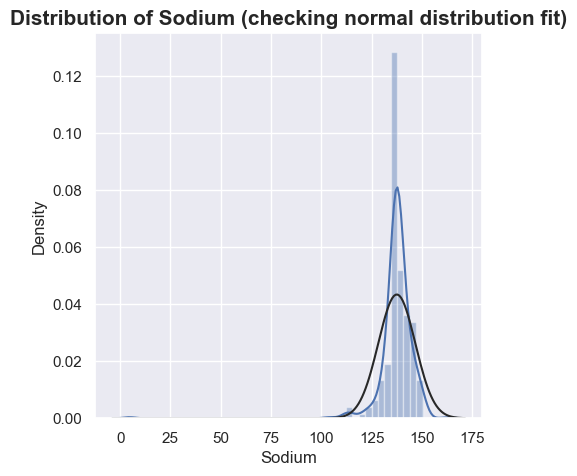

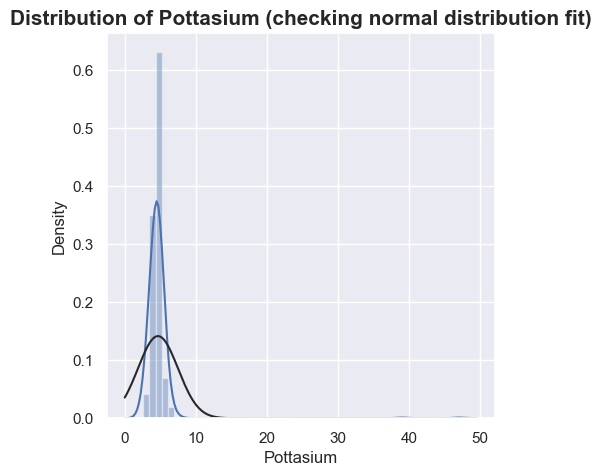

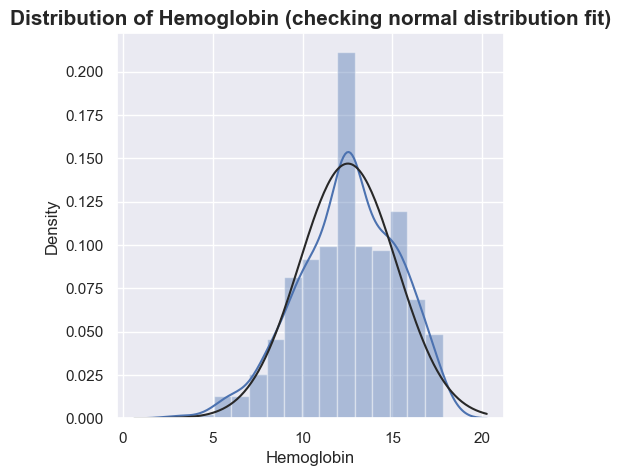

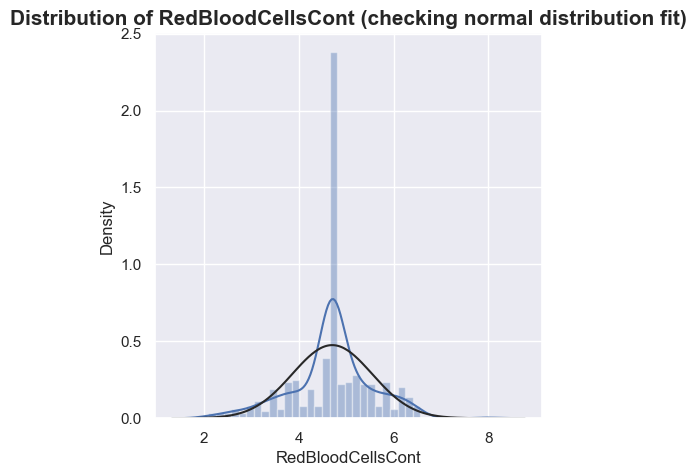

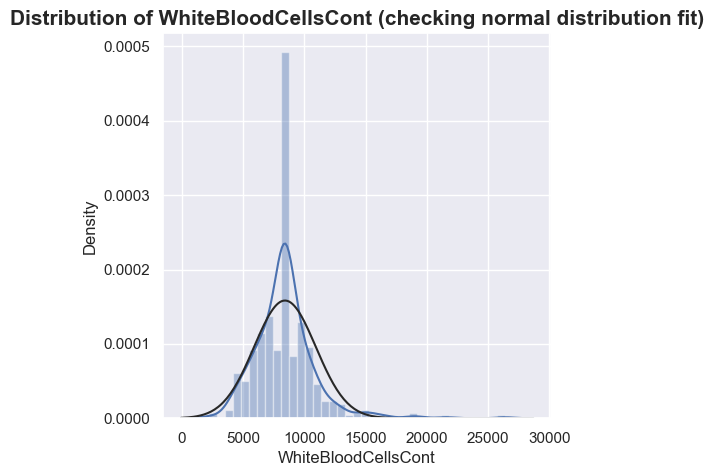

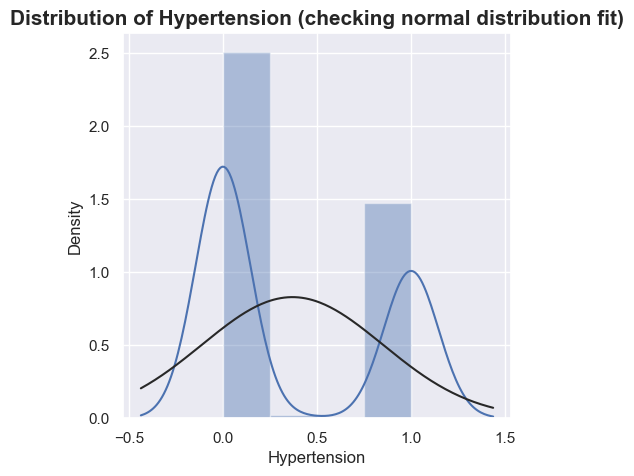

In [8]:
#checking the distribution of independent(predictor) variables
datalist= ['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']
 
for i in datalist:
    from scipy import stats
    plt.figure(figsize= (5,5))
    sns.distplot(data[i], fit = stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",size = 15, weight = "bold")



### Observations from graphs:

__BloodPressure__ : nomral distribution

__SpecificGravity__: almost normal distribution with a bit of left-skewness

__Albumin__: almost normal distribution with a bit of right-skewness

__SerumCreatinine__ : almost normal distribution with a bit of left-skewness

__BloodUrea__ : almost normal distribution with a bit of right-skewness

__Sodium__ : nomral distribution with a bit of edge-peak

__Potassium__ : almost normal distribution with a bit of right-skewness

__Hemoglobin__: normal distribution

__WhiteBloodCellConncentration__ : almost normal distribution with a bit of right-skewness

__RedBloodCellConcentration__ : normal distribution


In [9]:
#Dropping dependent valirable from dataframe to obtain the distributions of independent variables
datafinal = data.drop('ChronicKidneyDisease', axis=1)

<AxesSubplot:>

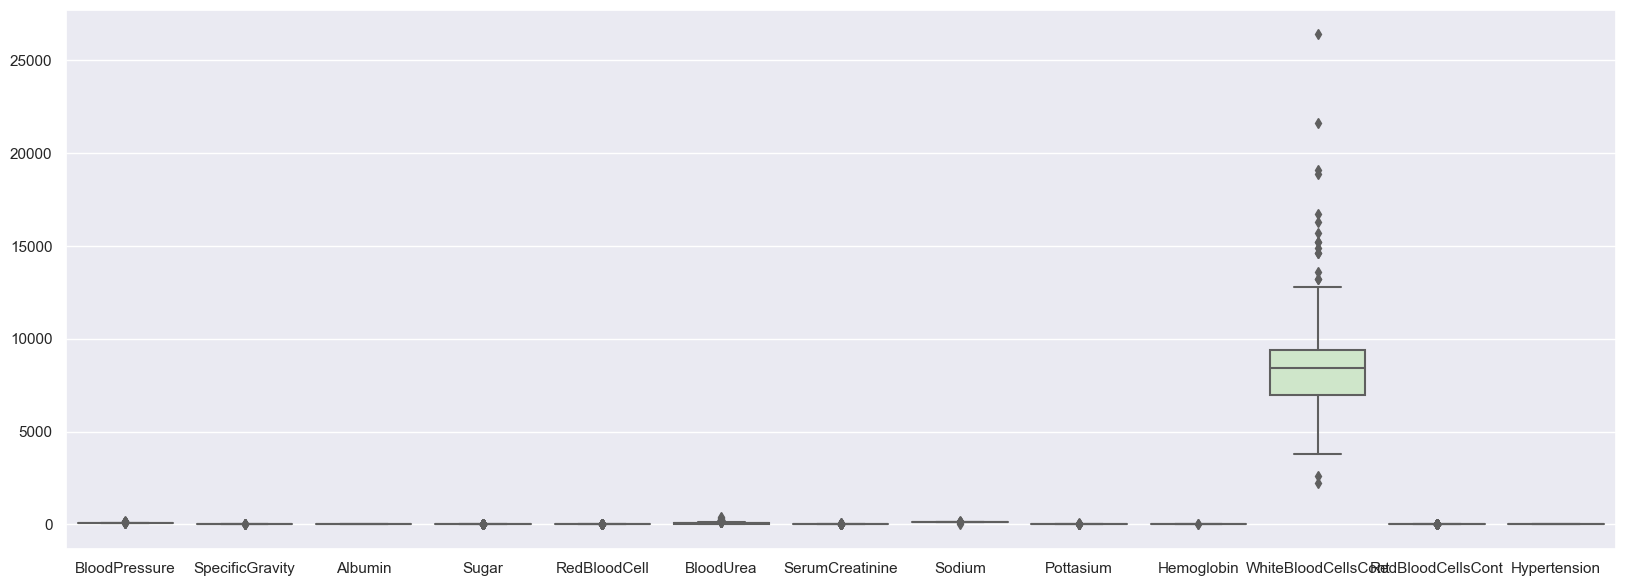

In [10]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal, palette="Set3")

### Observations:

The range of WhiteBloodCells is way too high and is dominating as compared to other predictor variables.Because of which it is suppressing other valiables Therefore, we are not able to visualize the ranges for other predictor variables. Hence we perform normalisation

So what should be do next to visualize ranges of other predictor variables?

We will plot the charts separately to get the ranges of each one of them

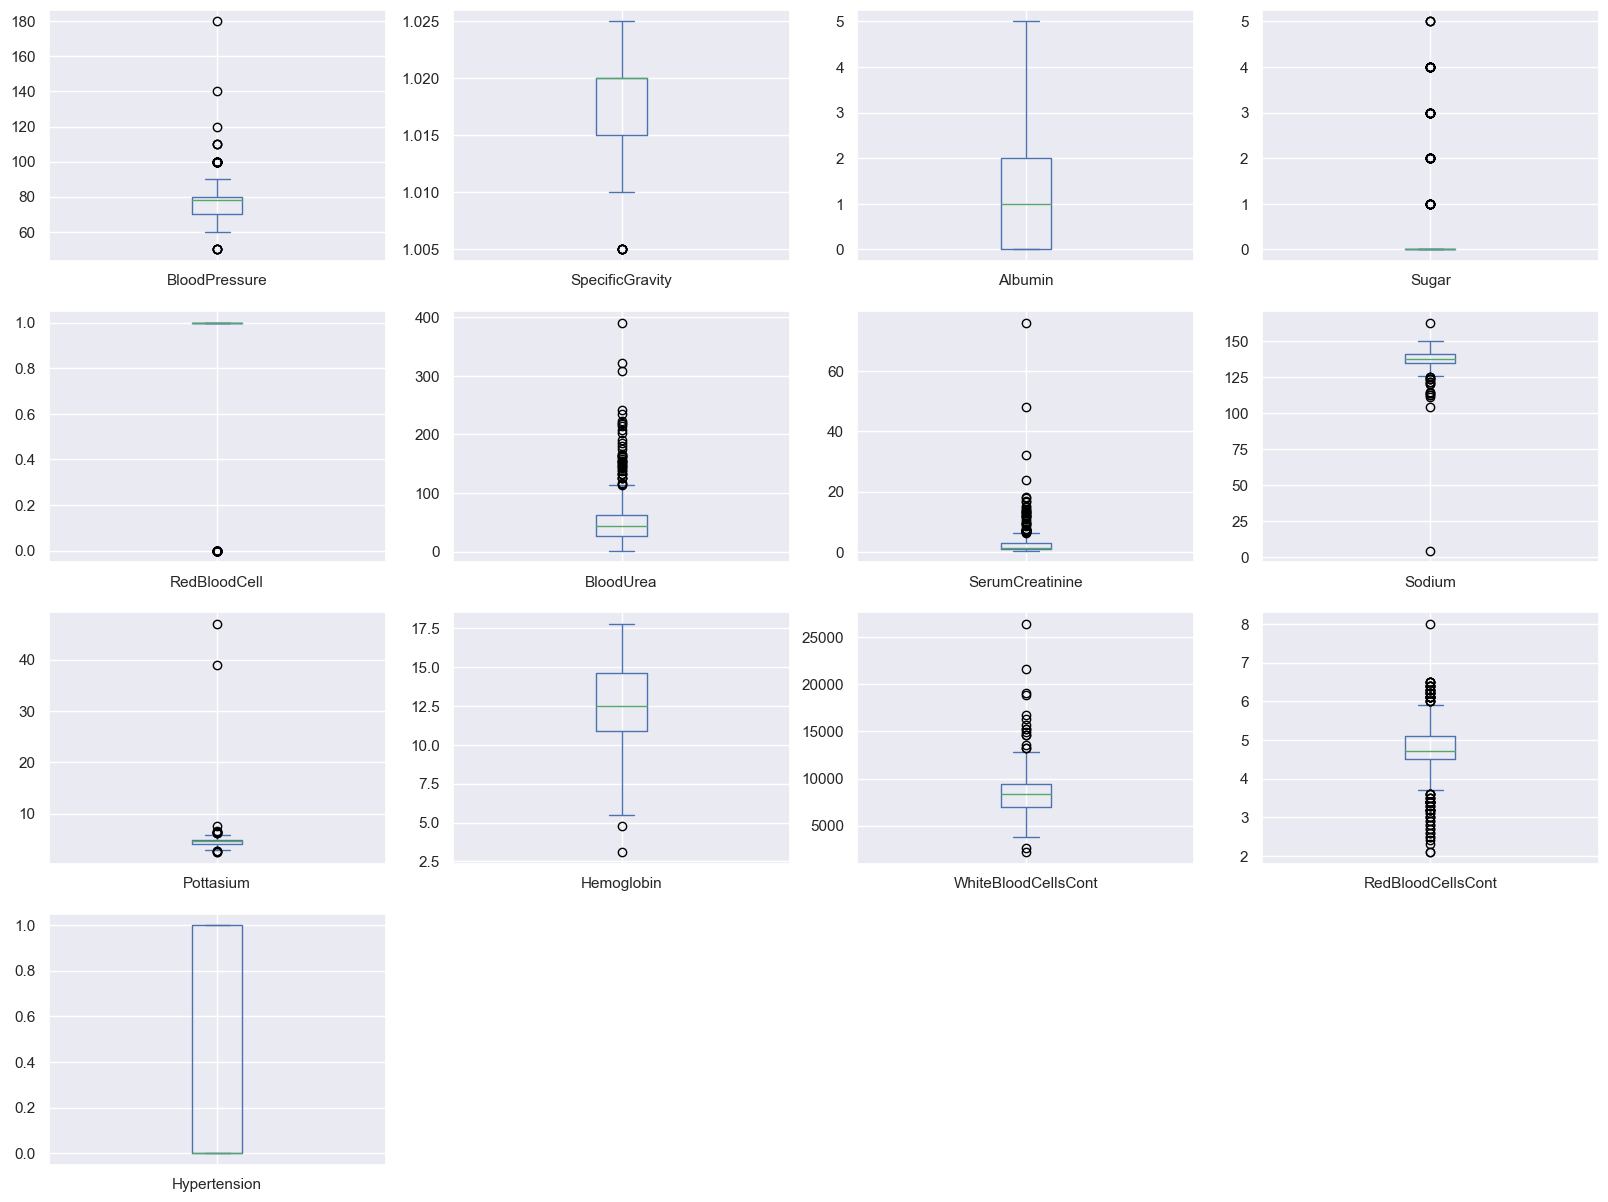

In [11]:
import matplotlib.pyplot as plt

# Create box plots for all numeric variables
datafinal.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

<AxesSubplot:>

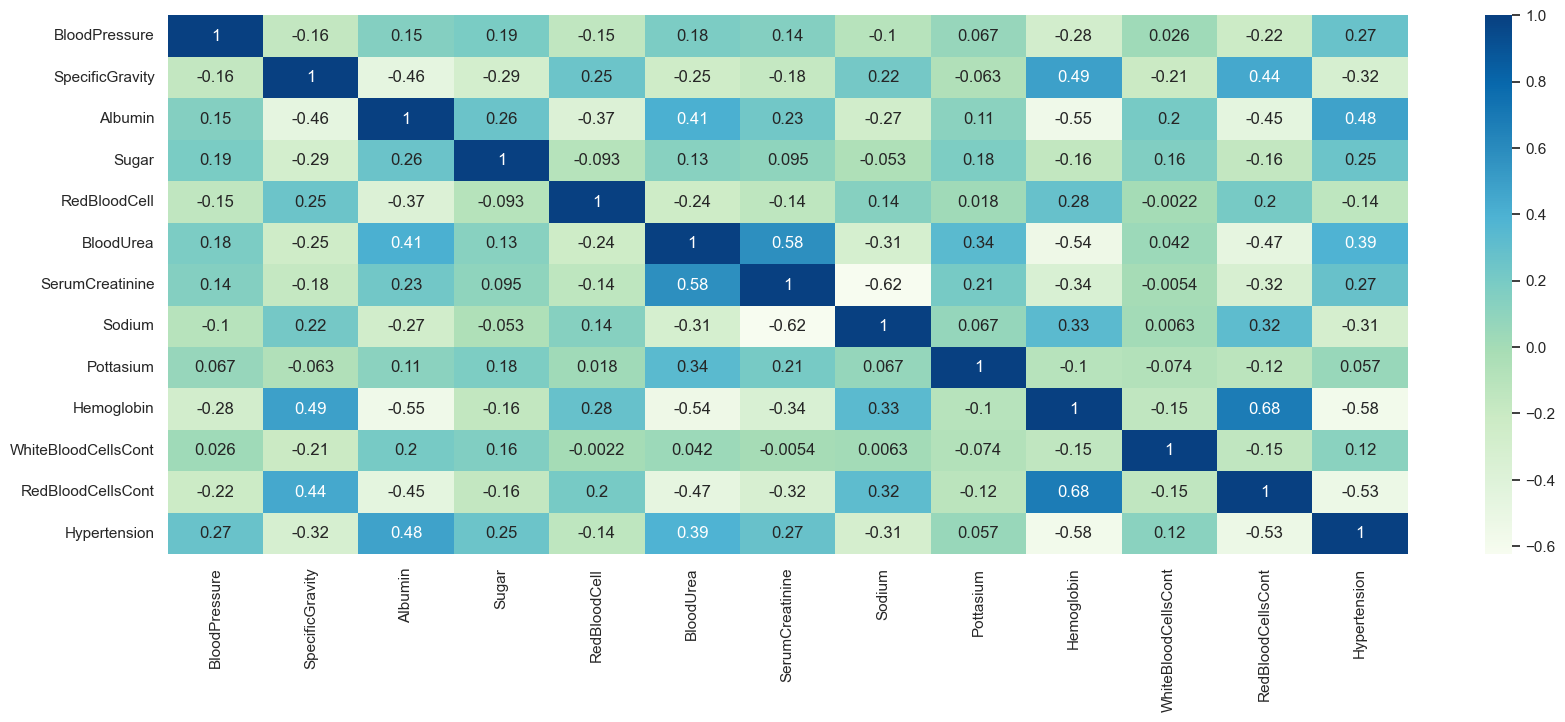

In [12]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='GnBu')

### Observations:
1. From the plots, we do not have much high correlation between features.
2. Red Blood Cell concentration and Hemoglobin are highly coorelated
3. Serum Creatinine and Blood urea has the coorelation value of 0.58

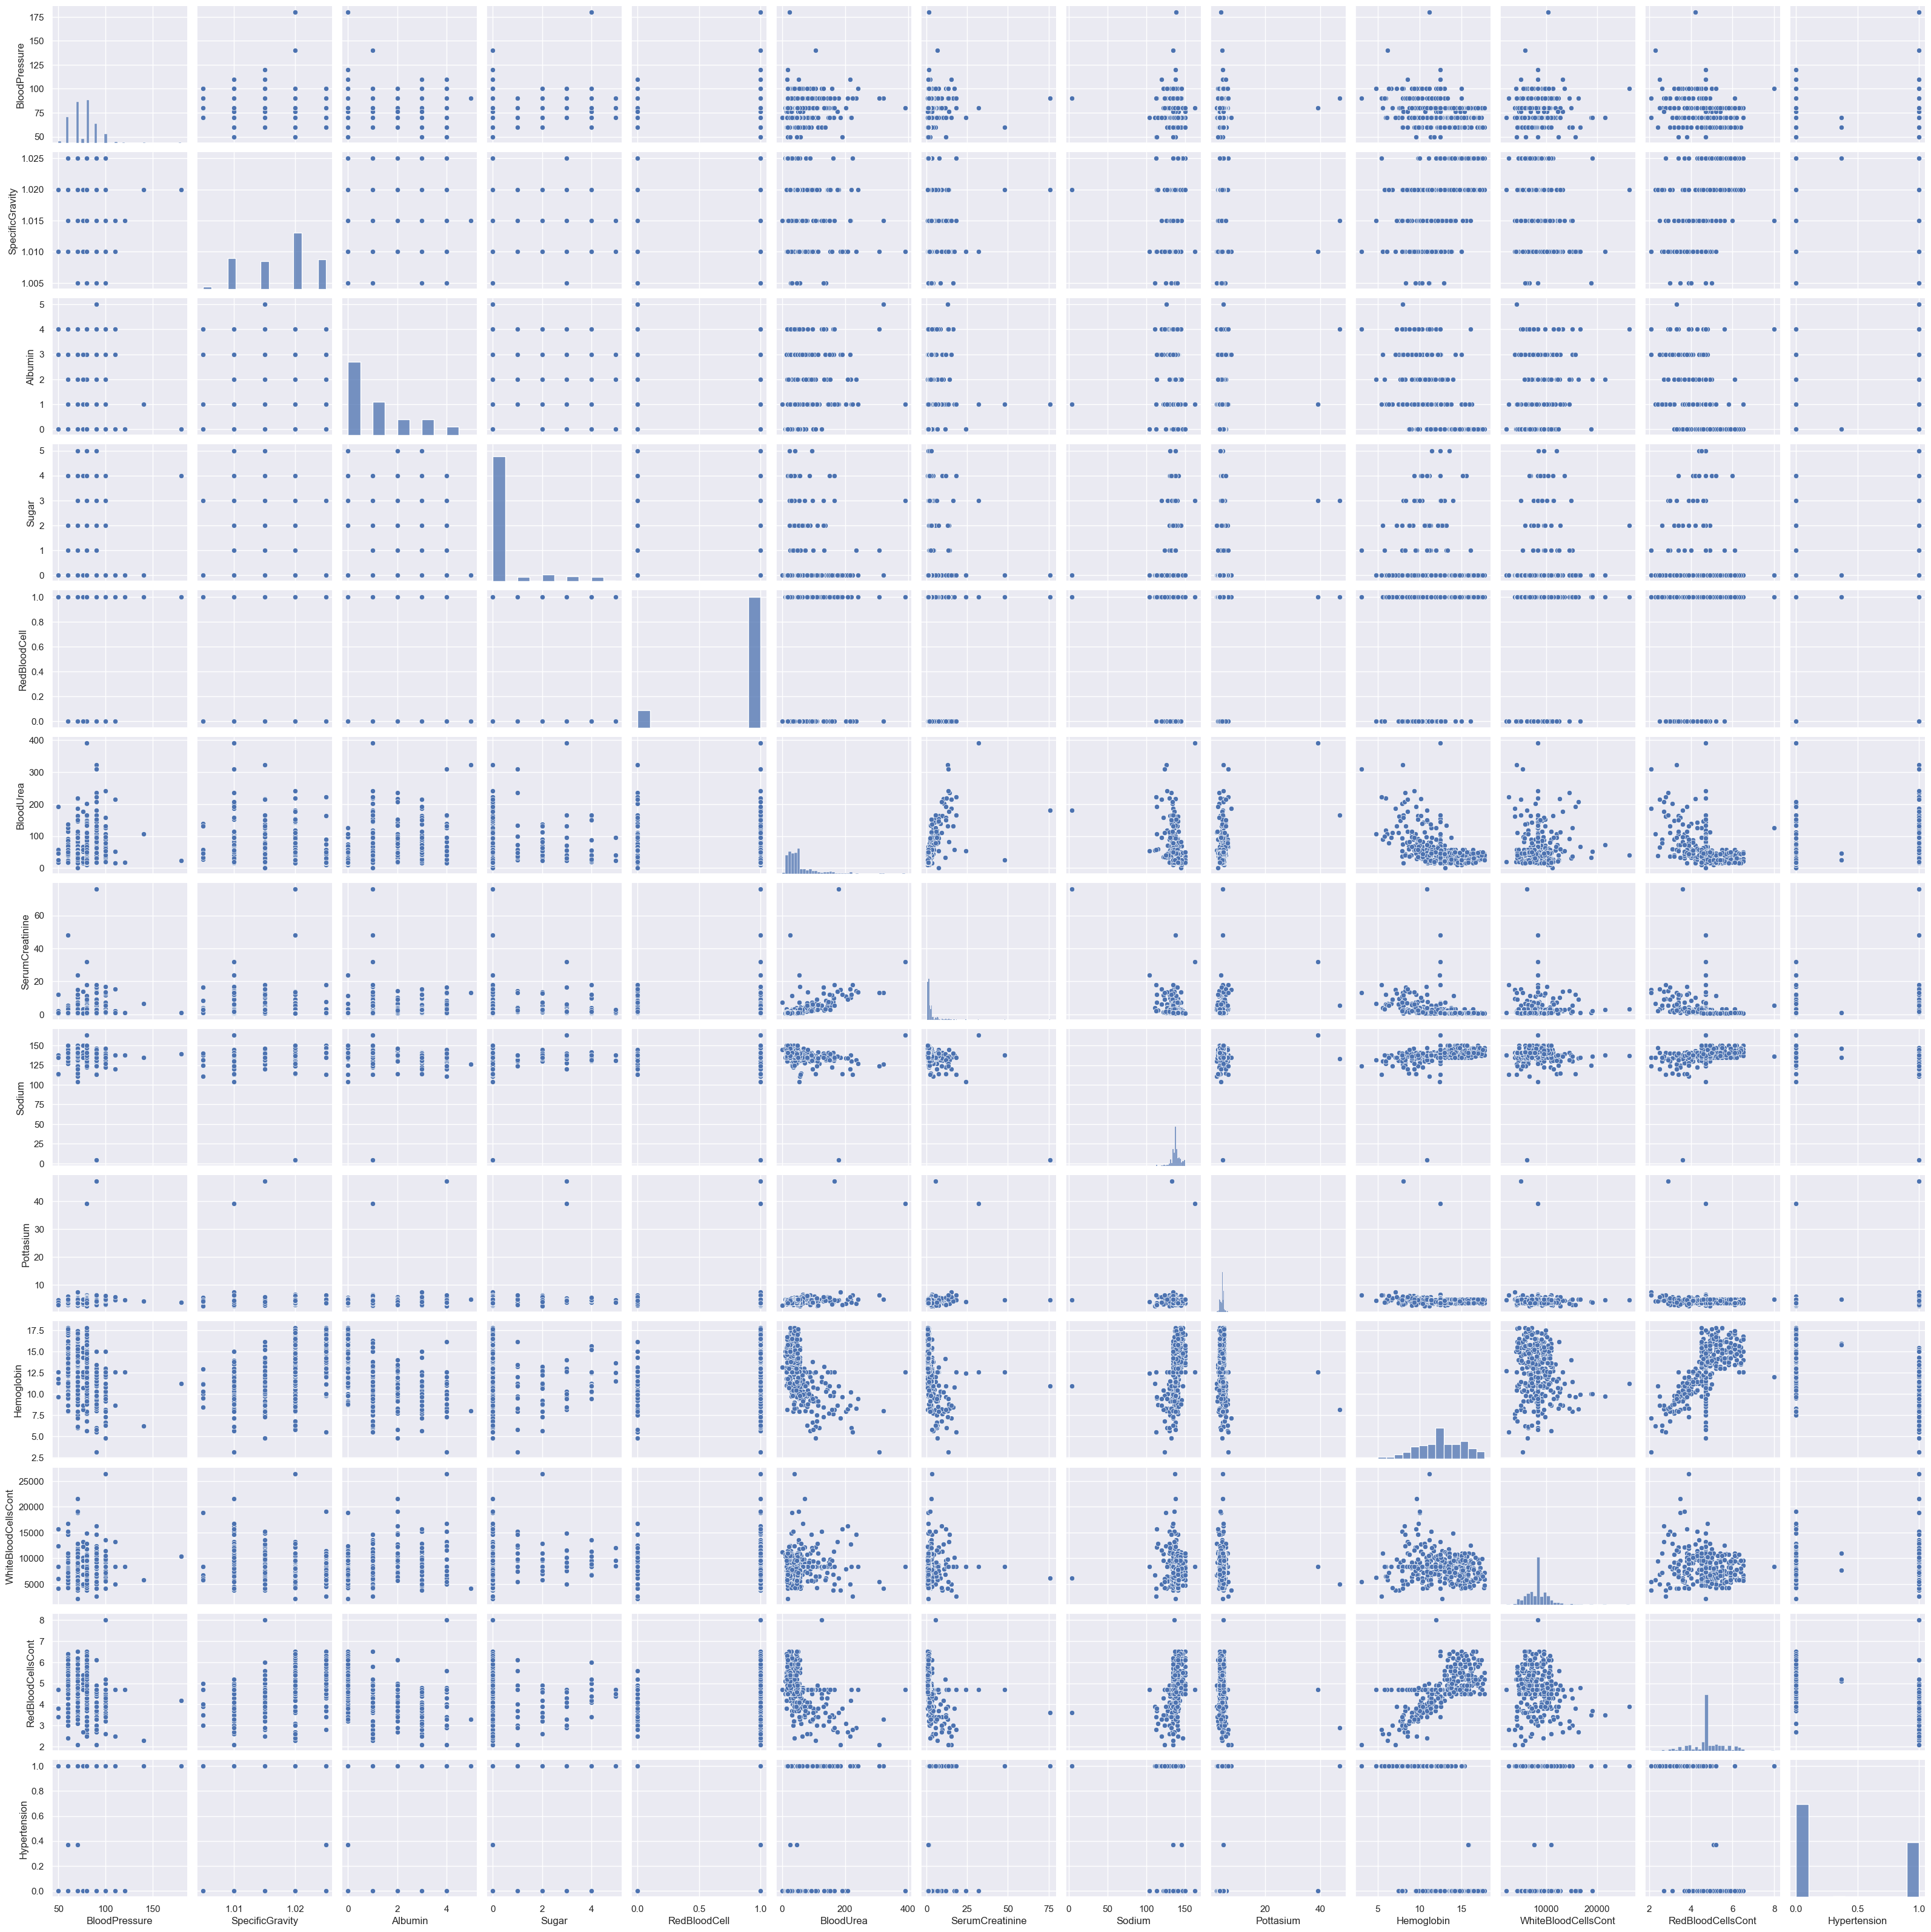

In [13]:
#pair plot to check the colinearity
sns.pairplot(datafinal) 
plt.show()


# What kind of data exploration did you do?
#### First things first
- __Datatype Check__ - All the features in the dataset are Integers/ Float.
- __Missing Data Check__ - Our Dataset didn't had any missing values in any of the features
- __Distribution of training data__ - I checked the probability distribution of each and every feature in the training dataset and recorded observations
- __Correlation Check__ - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that  the didn't had any significant multi colinearity issues.
- __Histogram Plot__ - I have also plotted histograms for each numerical column in the dataframe and analyzed individual feature distribution
- __Barplot__ - Performed Barplot analysis to findout how a variable impacts on prediction of disease

## Data Cleaning
This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.I have performed various imputation techniques to acheive the same

### How to handle missing data - Data Imputation techniques
- Adding missing values to the original dataframe by randomly selecting a percentage of rows and columns (1%, 5%, and 10%) and replacing the values in those rows and columns with NaN.
- Performing median and mode imputation of missing values
- KNN Imputation 
- MICE Imputation

Our dataset doesn't have any missing values, lets deliberately create some missing values and have a comparative analysis of how effectively each method is recovering the data back.

We will remove 1%, 5% and 10% of the data from alcohol in our dataset and see how well Mean Imputation and MICE imputation will recover the data back


In [14]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)
    
#creating new dataframe with 1%,5% and 10% missing values    
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

In [15]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

Number of missing values
1% missing 4
5% missing 20
10% missing 40


,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1.0
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1.0
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1.0
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1.0
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1.0


In [16]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         396 non-null    float64
 1   SpecificGravity       396 non-null    float64
 2   Albumin               396 non-null    float64
 3   Sugar                 396 non-null    float64
 4   RedBloodCell          396 non-null    float64
 5   BloodUrea             396 non-null    float64
 6   SerumCreatinine       396 non-null    float64
 7   Sodium                396 non-null    float64
 8   Pottasium             396 non-null    float64
 9   Hemoglobin            396 non-null    float64
 10  WhiteBloodCellsCont   396 non-null    float64
 11  RedBloodCellsCont     396 non-null    float64
 12  Hypertension          396 non-null    float64
 13  ChronicKidneyDisease  396 non-null    float64
dtypes: float64(14)
memory usage: 46.4 KB


Here we are dropping all the rows from the newly created dataframes with missing values that contain NaN values. It creates new dataframes, called "df_1_percent_without_nan", "df_5_percent_without_nan", and "df_10_percent_without_nan", which do not contain any rows with NaN values. These dataframes are created by using the "dropna()" function on the dataframes "predictors_missing_1_percent", "predictors_missing_5_percent", and "predictors_missing_10_percent", respectively.

Here we are creating new dataframes with the same data as the original dataframe, but with 1%, 5% and 10% of the data points replaced with NaN values. The original dataframe is copied using the copy() method, and then values are set to NaN using the at method of the dataframe.

Then, it is creating new dataframe with dropped na values from the above created dataframe with missing values. For example, df_1_percent_without_nan is created by dropping the NaN values from the predictors_missing_1_percent dataframe. The info() method is then used to display information about the dataframe, such as the number of non-null values in each column.

In [17]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

In [18]:
num_cols=['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']

cat_cols=['ChronicKidneyDisease']

predict_impute_1=pd.DataFrame()
predict_impute_5=pd.DataFrame()
predict_impute_10=pd.DataFrame()
for col in num_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())
for col in cat_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_1_percent[col].mode())

# Imputation Method 1 : Impute Numerical values with Median and Categorical value with Mode

In [19]:
from sklearn import tree
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [20]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.96
AUC: 0.96
Log Loss: 1.40
Confusion Matrix:
 [[35  1]
 [ 3 60]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.94
AUC: 0.94
Log Loss: 2.18
Confusion Matrix:
 [[33  2]
 [ 4 56]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.97
AUC: 0.97
Log Loss: 1.15
Confusion Matrix:
 [[32  0]
 [ 3 55]]

-------------------------------


# Imputation Method 2 : Impute using KNN imputer

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [22]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
predict_impute_1 = predict_impute_1.dropna()
predict_impute_5 = predict_impute_5.dropna()
predict_impute_10 = predict_impute_10.dropna()

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [23]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.95
AUC: 0.94
Log Loss: 1.73
Confusion Matrix:
 [[32  3]
 [ 2 63]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.99
AUC: 0.99
Log Loss: 0.35
Confusion Matrix:
 [[35  0]
 [ 1 64]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.98
AUC: 0.98
Log Loss: 0.69
Confusion Matrix:
 [[36  0]
 [ 2 62]]

-------------------------------


#  Imputation Method 3 : MICE Imputation technique

In [24]:
!pip install fancyimpute
#from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer as MICE
import pandas as pd


# create a copy of the original dataframe with missing values
df_missing = predictors
df_missing.iloc[2:5,3:6] = np.nan

# create an imputer object
imputer = MICE()

# fit the imputer on the data
imputer.fit(predictors)

#MICE().fit_transform(df)


# perform the imputation
df_imputed = imputer.transform(predictors)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [25]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [26]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.96
AUC: 0.96
Log Loss: 1.40
Confusion Matrix:
 [[35  1]
 [ 3 60]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.94
AUC: 0.94
Log Loss: 2.18
Confusion Matrix:
 [[33  2]
 [ 4 56]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.97
AUC: 0.97
Log Loss: 1.15
Confusion Matrix:
 [[32  0]
 [ 3 55]]

-------------------------------


# Interpreting the Imputation Methods





# Feature Importance and Selection

- Lets fit a very simple linear model to understand how the predictor variable are impactimng in prediction of Kidney Disease


### Normalization

In [27]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']] = pd.DataFrame(x_scaled)

In [28]:
#data after noromalizing and feature creation
datafinal.describe()

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.203500,0.635625,0.203000,0.079000,0.882500,0.143531,0.035349,0.839300,0.047817,0.641286,0.256450,0.442081,0.369350
std,0.103666,0.271701,0.254466,0.208008,0.322418,0.126537,0.074305,0.058071,0.063366,0.184774,0.104265,0.142426,0.482023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.500000,0.000000,0.000000,1.000000,0.065469,0.006614,0.823344,0.033708,0.528912,0.197314,0.406780,0.000000
50%,0.215385,0.750000,0.200000,0.000000,1.000000,0.109114,0.013228,0.839306,0.047865,0.641497,0.256446,0.442373,0.000000
75%,0.230769,0.750000,0.400000,0.000000,1.000000,0.154685,0.035317,0.861199,0.051685,0.784014,0.297521,0.508475,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Observations:

We can see that the numerical variables - BloodPressure,Albumin,BloodUrea,Sodium,Potassium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont are now in the range of 0 to 1

<AxesSubplot:>

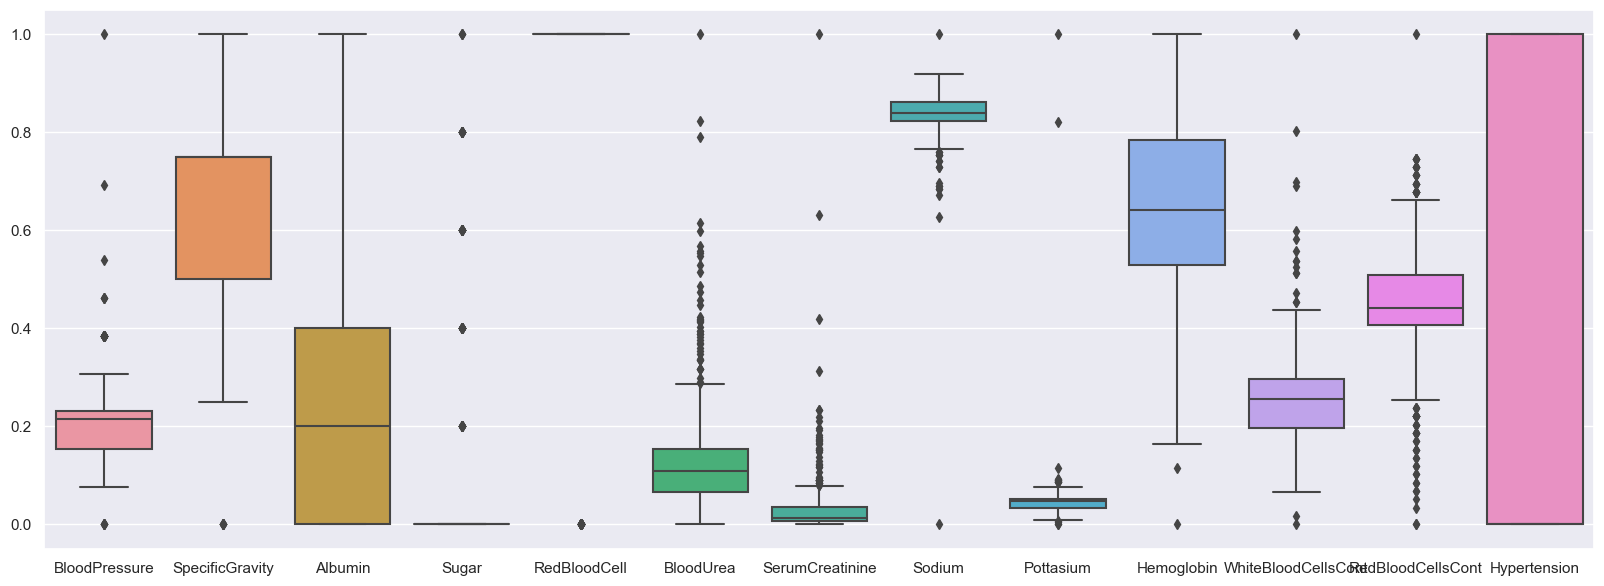

In [29]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal)

# Observations:
Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1.Blood Pressure,BloodUrea,Serum Creatanine,Sodium,Potassium,WBCCont,RBCCont has outliers which means that their concentration level in body do not impact much in identifying the chronic kidney disease.

2.Sugar levels indicate errors or unusual observations.

In [65]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = data.drop(["ChronicKidneyDisease"], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, data.ChronicKidneyDisease), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [31]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "ChronicKidneyDisease ~ BloodPressure+SpecificGravity+Albumin+RedBloodCell+Sugar+SerumCreatinine+BloodUrea+Sodium+Pottasium+Hemoglobin+RedBloodCellsCont+WhiteBloodCellsCont+Hypertension",

    data=df_norm,
).fit()
print(results.summary())  

                             OLS Regression Results                             
Dep. Variable:     ChronicKidneyDisease   R-squared:                       0.713
Model:                              OLS   Adj. R-squared:                  0.704
Method:                   Least Squares   F-statistic:                     73.85
Date:                  Tue, 21 Mar 2023   Prob (F-statistic):           4.50e-96
Time:                          16:34:41   Log-Likelihood:                -27.596
No. Observations:                   400   AIC:                             83.19
Df Residuals:                       386   BIC:                             139.1
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

### Observations:

1. __Blood Pressure__ has a p-value of 0.040 which is lesser than 0.05 so it is a significant feature
2. __Specific Gravity__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
3. __Albumin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
4. __RedBloodCell__ has a p-value of 0.629 which is greater than 0.05 so it is not a significant feature
5. __Sugar__ has a p-value of 0.121 which is greater than 0.05 so it is not a significant feature
6. __Serum Creatinine__has a p-value of 0.390 which is greater than 0.05 so it is not significant feature
7. __Blood Urea__ has a p-value of 0.008 which is lesser than 0.05 so it is a significant feature
8. __Sodium__ has a p-value of 0.196 which is greater than 0.05 so it is a not significant feature
9. __Pottasium__ has a p-value  of 0.711 which is greater than 0.05 so it is not a significant feature
10. __Hemoglobin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
11. __RedBloodCellsCont__ has a p-value 0.312 which is greater than 0.05 so it is not a significant feature
12. __WhiteBloodCellsCont__ has a p-value 0.397 which is greater than 0.05 so it is not a significant feature
13. __Hypertension__ has a p-value 0.0  which is lesser than 0.05 so it is a significant feature

Lets consider only these features and calculate the model fit again, and then lets have a comparative analysis of both models.

In [32]:
df_norm_feature_selected = df_norm[
    [
        "BloodPressure",
        "SpecificGravity",
        "Albumin",
        "BloodUrea",
        "Hemoglobin",
        "Hypertension",
        "ChronicKidneyDisease",
    ]
]

In [33]:
results2 = smf.ols(
    "ChronicKidneyDisease ~ BloodPressure+SpecificGravity+Albumin+BloodUrea+Hemoglobin+Hypertension",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())  # OLS Linear Model Summary

                             OLS Regression Results                             
Dep. Variable:     ChronicKidneyDisease   R-squared:                       0.705
Model:                              OLS   Adj. R-squared:                  0.701
Method:                   Least Squares   F-statistic:                     156.8
Date:                  Tue, 21 Mar 2023   Prob (F-statistic):          4.91e-101
Time:                          16:34:42   Log-Likelihood:                -32.972
No. Observations:                   400   AIC:                             79.94
Df Residuals:                       393   BIC:                             107.9
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.

In [34]:
predicted_quality_1 = results.predict(
    df_norm[
        [
            "BloodPressure","SpecificGravity","Albumin","RedBloodCell","Sugar","SerumCreatinine","BloodUrea","Sodium","Pottasium","Hemoglobin","RedBloodCellsCont","WhiteBloodCellsCont","Hypertension"
        ]
    ]
)
df_norm["predicted_quality_1"] = predicted_quality_1.round()

In [35]:
predicted_quality_2 = results2.predict(
    df_norm_feature_selected[
        [
         "BloodPressure",
        "SpecificGravity",
        "Albumin",
        "BloodUrea",
        "Hemoglobin",
        "Hypertension"
        ]
    ]
)
df_norm_feature_selected["predicted_quality_2"] = predicted_quality_2.round()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [37]:
print(
    "Accuracy of predicting the correct quality of wine using all features = ",
    100 - percentage_change(df_norm["ChronicKidneyDisease"], df_norm["predicted_quality_1"]),
)
print(
    "Accuracy of predicting the correct quality of wine using only significant features is = ",
    100
    - percentage_change(
        df_norm_feature_selected["ChronicKidneyDisease"],
        df_norm_feature_selected["predicted_quality_2"],
    ),
)

Accuracy of predicting the correct quality of wine using all features =  95.000000005
Accuracy of predicting the correct quality of wine using only significant features is =  95.000000005


From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

From the above two interpretations, our observation is that in both the cases our model predicts the quality of wine pretty good and they are pretty close to each other. Model who uses all features slighly overcomes the model who is using only the statistically important features with and accuracy of 92.432% compared to the 92.43 % of the later

From the above studies let's stick to the data with all featues and try using different models

In [38]:
df_norm = df_norm.drop(["predicted_quality_1"], axis=1)

In [39]:
X = df_norm.drop(["ChronicKidneyDisease"], axis=1)  # Training Feature
Y = df_norm["ChronicKidneyDisease"]  # Target

# How did you split the data into train, and test?

In [40]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# Fitting Linear Model

In [41]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [42]:
y_linear_predictions = linear_model.predict(x_test).round()

# Fitting Tree Based Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=10, random_state=0)

In [44]:
y_tree_based_predictions = tree_model.predict(x_test).round()

# Fitting a Support Vector Machine (SVM)

In [45]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [46]:
svm_predictions = svm_model.predict(x_test).round()

# Using AutoML to find out the best Model

In [47]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [48]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [49]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:31371 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-11.0.17+8 (build 11.0.17+8, mixed mode)
  Starting server from C:\Users\Dell\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dell\AppData\Local\Temp\tmp53kcz6cg
  JVM stdout: C:\Users\Dell\AppData\Local\Temp\tmp53kcz6cg\h2o_Dell_started_from_python.out
  JVM stderr: C:\Users\Dell\AppData\Local\Temp\tmp53kcz6cg\h2o_Dell_started_from_python.err
  Server is running at http://127.0.0.1:31371
Connecting to H2O server at http://127.0.0.1:31371 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,H2O_from_python_Dell_x57jeu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.977 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [50]:
# Converting Pandas dataframe in H2O dataframe
df = h2o.H2OFrame(
    data
) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [52]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "ChronicKidneyDisease"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [53]:

autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
16:35:10.853: AutoML: XGBoost is not available; skipping it.
16:35:10.976: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:35:11.666: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
16:35:12.986: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
16:35:13.130: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical befo

In [54]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230321_163510_model_17,0.10035,0.0100701,0.0359111,0.0692465,0.0100701
StackedEnsemble_BestOfFamily_4_AutoML_1_20230321_163510,0.101475,0.0102971,0.0437415,0.0712338,0.0102971
StackedEnsemble_BestOfFamily_5_AutoML_1_20230321_163510,0.103703,0.0107544,0.0265101,0.0715204,0.0107544
GBM_grid_1_AutoML_1_20230321_163510_model_13,0.103721,0.010758,0.0403877,0.0724881,0.010758
GBM_grid_1_AutoML_1_20230321_163510_model_174,0.104236,0.0108651,0.0438037,0.0716549,0.0108651
GBM_grid_1_AutoML_1_20230321_163510_model_178,0.105364,0.0111016,0.0411207,0.071843,0.0111016
GBM_grid_1_AutoML_1_20230321_163510_model_158,0.106237,0.0112864,0.0516779,0.0750221,0.0112864
GBM_grid_1_AutoML_1_20230321_163510_model_53,0.10736,0.0115262,0.0491064,0.0751152,0.0115262
GBM_grid_1_AutoML_1_20230321_163510_model_164,0.107526,0.0115618,0.039727,0.075217,0.0115618
GBM_grid_1_AutoML_1_20230321_163510_model_76,0.108126,0.0116913,0.0384846,0.0758804,0.0116913


In [55]:

autoML_model = getBestModel(autoML[2])  # Getting Best Model

34


In [56]:
autoML_best_predictions = autoML_model.predict(df_test).round()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [57]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["ChronicKidneyDisease"], use_pandas=False)

In [58]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [59]:

autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

# Hyperparameter Tuning of AutoML's Best Model

In [60]:
train, validate, test = np.split(
    data.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="ChronicKidneyDisease",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_1
Best R2: 0.9594463312986752


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


In [61]:
best_drf_model

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,75.0,75.0,11499.0,2.0,10.0,4.5066667,3.0,14.0,7.5466666
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-03-21 16:38:56,0.034 sec,0.0,nan,nan,nan,nan,nan,nan
,2023-03-21 16:38:56,0.040 sec,1.0,0.2304286,0.0530973,0.0530973,0.2738613,0.075,0.075
,2023-03-21 16:38:56,0.043 sec,2.0,0.2248254,0.0573770,0.0505464,0.2561738,0.08125,0.065625
,2023-03-21 16:38:56,0.046 sec,3.0,0.2063586,0.0573899,0.0425839,0.2041241,0.0666667,0.0416667
,2023-03-21 16:38:56,0.050 sec,4.0,0.2155513,0.0702541,0.0464624,0.1745530,0.059375,0.0304687
,2023-03-21 16:38:56,0.053 sec,5.0,0.2011600,0.0658120,0.0404653,0.1466288,0.0525000,0.0215000
,2023-03-21 16:38:56,0.058 sec,6.0,0.1742214,0.0567797,0.0303531,0.1419116,0.05,0.0201389
,2023-03-21 16:38:56,0.061 sec,7.0,0.1567427,0.0559028,0.0245683,0.1437472,0.0517857,0.0206633


In [62]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["ChronicKidneyDisease"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [63]:
print(
    "Accuracy of predicting Chronic Kidney Disease using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Accuracy of predicting Chronic Kidney Disease using Linear Model =  95.000000005
Accuracy of predicting Chronic Kidney Disease using Tree Based Model =  97.5000000025
Accuracy of predicting Chronic Kidney Disease using SVM =  97.5000000025
Accuracy of predicting Chronic Kidney Disease using best AutoML model =  -1219512096.341463
Accuracy of predicting Chronic Kidney Disease using best AutoML model with Tuned Hyper-Parameters =  -3658536485.365853
